In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from nltk.corpus import stopwords
stop = stopwords.words('english')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
#     filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
#     stem_words=[stemmer.stem(w) for w in filtered_words]
#     lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(rem_num)


# df['cleanText']=df['Text'].map(lambda s:preprocess(s)) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chike\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
train_df=pd.read_csv("C:\\Users\\Chike\\Documents\\Projects\\twitter-disaster-prediction\\data\\raw\\train.csv")
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [49]:
train_df['clean_text']=train_df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
train_df['clean_text']=train_df['clean_text'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
train_df['clean_text']=train_df['clean_text'].str.replace('\d+', '')
train_df['clean_text']=train_df['clean_text'].str.lower()
train_df['clean_text']=train_df['clean_text'].str.replace('\W', ' ')
train_df['clean_text']=[' '.join([w for w in x.lower().split() if w not in stop]) for x in train_df['clean_text'].tolist()]


train_df.clean_text

<ipython-input-49-24954376e5bf>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['clean_text']=train_df['clean_text'].str.replace('\d+', '')
<ipython-input-49-24954376e5bf>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['clean_text']=train_df['clean_text'].str.replace('\W', ' ')


0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria_ahrary thetawniest control wild fires cal...
7610                                utc km volcano hawaii
7611    police investigating e bike collided car littl...
7612    latest homes razed northern california wildfir...
Name: clean_text, Length: 7613, dtype: object

In [50]:
train_df.clean_text

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria_ahrary thetawniest control wild fires cal...
7610                                utc km volcano hawaii
7611    police investigating e bike collided car littl...
7612    latest homes razed northern california wildfir...
Name: clean_text, Length: 7613, dtype: object

In [58]:
sentences=[text.split(' ') for text in train_df['clean_text']]
model = Word2Vec(sentences, min_count=5,size=100,window=4)
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])

Word2Vec(vocab=2567, size=100, alpha=0.025)
['reason', 'earthquake', 'may', 'allah', 'us', 'forest', 'fire', 'near', 'la', 'canada', 'residents', 'asked', 'shelter', 'place', 'officers', 'evacuation', 'orders', 'expected', 'people', 'wildfires', 'california', 'got', 'sent', 'photo', 'alaska', 'smoke', 'school', 'update', 'hwy', 'closed', 'due', 'lake', 'county', 'flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'colorado', 'springs', 'areas', 'top', 'hill', 'see', 'emergency', 'happening', 'building', 'across', 'street', 'afraid', 'tornado', 'coming', 'area', 'three', 'died', 'heat', 'wave', 'far', 'haha', 'south', 'getting', 'wait', 'second', 'live', 'gonna', 'florida', 'days', 'lost', 'myanmar', 'arrived', 'damage', 'bus', 'car', 'crash', 'breaking', 'man', 'love', 'summer', 'lovely', 'fast', 'london', 'cool', 'wonderful', 'day', 'way', 'eat', 'shit', 'nyc', 'last', 'week', 'girlfriend', 'like', 'end', 'markets', 'ablaze', 'always', 'try', 'bring', 'meta

<ipython-input-58-49a445ac0b86>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['sentence'])


KeyError: "word 'sentence' not in vocabulary"

In [70]:
model.wv.most_similar_cosmul(positive=['japan', 'hiroshima'], negative=['canada'])


[('mosque', 1.0028578042984009),
 ('latest', 1.0028272867202759),
 ('ladies', 1.0028018951416016),
 ('damage', 1.0027921199798584),
 ('electrocuted', 1.0027540922164917),
 ('suicide', 1.0027501583099365),
 ('lives', 1.0027445554733276),
 ('ever', 1.0027443170547485),
 ('without', 1.0027425289154053),
 ('big', 1.0027252435684204)]

In [7]:
model

In [75]:
# model.save('C:\\Users\\Chike\\Documents\\Projects\\twitter-disaster-prediction\\models\\word_vector_model.bin')
model.wv.save_word2vec_format('C:\\Users\\Chike\\Documents\\Projects\\twitter-disaster-prediction\\models\\word_vector_model.txt',binary=False)

In [68]:
model.most_similar('storm')

<ipython-input-68-86f2c556b7d6>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('storm')


[('amp', 0.999889612197876),
 ('us', 0.9998836517333984),
 ('get', 0.9998766183853149),
 ('first', 0.9998734593391418),
 ('could', 0.9998716115951538),
 ('like', 0.9998713731765747),
 ('w', 0.9998659491539001),
 ('new', 0.9998619556427002),
 ('would', 0.999860405921936),
 ('let', 0.999860405921936)]

In [33]:
w=model['hello']

<ipython-input-33-bf0adc080765>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  w=model['hello']


In [67]:
model.similarity('cat','dog')

<ipython-input-67-24e53453ee11>:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  model.similarity('cat','dog')


0.9944706

In [34]:
print(len(w))

50


In [35]:
print(w)

[ 0.0103592   0.0167392  -0.1259266   0.05049117 -0.05695653 -0.01029395
 -0.13956724 -0.07173952 -0.0157936   0.08282437 -0.22417651 -0.18025127
 -0.08046712 -0.00919821 -0.05052771 -0.0220044   0.00461344  0.0289478
  0.03481887 -0.10265608 -0.03456781 -0.19264355 -0.05603924  0.0635503
  0.00358791 -0.06591843 -0.00295201  0.12138583 -0.00325612  0.0275659
 -0.02604444  0.04579365  0.00786794  0.06933671 -0.04384732 -0.0536418
 -0.08605436 -0.03346424  0.13791889 -0.02889239  0.12472684  0.11659456
  0.11075076  0.05519648  0.02435321  0.06159047 -0.07476112  0.07061774
 -0.13373831 -0.12103232]


In [40]:
w1=model['flood']
w2=model['fire']
dist=np.linalg.norm(w1-w2)
dist

<ipython-input-40-3b798be0f9ff>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  w1=model['flood']
<ipython-input-40-3b798be0f9ff>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  w2=model['fire']


0.6802377

In [73]:
X = model[model.wv.vocab]

<ipython-input-73-c60322eee7e8>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


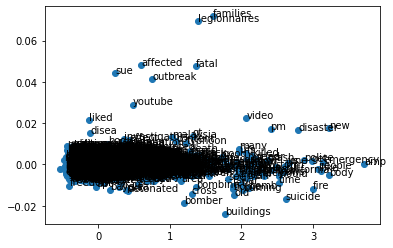

In [74]:
# train model
# model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
# X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [61]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'